<a href="https://colab.research.google.com/github/vgaurav3011/Data-Science-using-Python/blob/master/1st_DNN_improved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [3]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


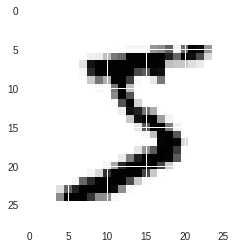

In [7]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [10]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [12]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [126]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(32,kernel_size=3, activation='relu'))
model.add(Convolution2D(32,kernel_size=5, strides=2, activation='relu'))
model.add(Convolution2D(64, kernel_size=3, activation='relu'))
model.add(Convolution2D(64, kernel_size=3, activation='relu'))
model.add(Convolution2D(64, kernel_size=5, activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Convolution2D(10, 1, 1))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1))`
  if sys.path[0] == '':


In [127]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_302 (Conv2D)          (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_303 (Conv2D)          (None, 24, 24, 32)        9248      
_________________________________________________________________
conv2d_304 (Conv2D)          (None, 10, 10, 32)        25632     
_________________________________________________________________
conv2d_305 (Conv2D)          (None, 8, 8, 64)          18496     
_________________________________________________________________
conv2d_306 (Conv2D)          (None, 6, 6, 64)          36928     
_________________________________________________________________
conv2d_307 (Conv2D)          (None, 2, 2, 64)          102464    
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 1, 1, 64)          0         
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [129]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 29s 481us/step - loss: 0.1359 - acc: 0.9585
Epoch 2/10
60000/60000 [==============================] - 27s 451us/step - loss: 0.0463 - acc: 0.9860
Epoch 3/10
60000/60000 [==============================] - 27s 448us/step - loss: 0.0322 - acc: 0.9901
Epoch 4/10
60000/60000 [==============================] - 27s 447us/step - loss: 0.0261 - acc: 0.9918
Epoch 5/10
60000/60000 [==============================] - 27s 442us/step - loss: 0.0217 - acc: 0.9932
Epoch 6/10
60000/60000 [==============================] - 27s 443us/step - loss: 0.0163 - acc: 0.9948
Epoch 7/10
60000/60000 [==============================] - 26s 441us/step - loss: 0.0153 - acc: 0.9952
Epoch 8/10
60000/60000 [==============================] - 26s 438us/step - loss: 0.0117 - acc: 0.9963
Epoch 9/10
60000/60000 [==============================] - 27s 446us/step - loss: 0.0121 - acc: 0.9964
Epoch 10/10
60000/60000 [==============================] - 26s 438us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [131]:
print(score)

[0.039593647306870115, 0.9901]


In [0]:
y_pred = model.predict(X_test)

In [133]:
print(y_pred[:9])
print(y_test[:9])

[[3.30864395e-07 5.63895097e-10 3.29286240e-06 1.84370708e-06
  1.42404338e-10 4.03684863e-09 5.65959822e-13 9.99991655e-01
  8.33006730e-09 2.89796503e-06]
 [1.76433013e-09 3.38171020e-08 1.00000000e+00 5.28818417e-13
  1.83534448e-13 9.51011453e-18 1.67786887e-08 4.18863590e-11
  1.73603867e-10 1.68253447e-16]
 [1.17596663e-07 9.99965549e-01 3.33083591e-07 1.01625841e-09
  1.14413066e-08 2.04429625e-07 7.57678436e-08 2.96193630e-05
  4.02243040e-06 4.03051352e-08]
 [9.99999881e-01 1.41670245e-10 1.00398292e-11 4.37280490e-11
  1.74362677e-11 1.53031088e-10 1.90527487e-08 4.35991521e-10
  3.51067868e-08 7.53789422e-08]
 [1.20242574e-16 1.23667962e-13 5.13745335e-17 2.06452317e-15
  1.00000000e+00 1.07423934e-16 2.78942502e-14 1.87351999e-15
  7.32716449e-15 9.30264372e-12]
 [2.06551256e-08 9.99987364e-01 1.50561092e-07 4.14962682e-11
  2.35697706e-09 7.35998196e-09 2.24024532e-09 1.16210540e-05
  8.01169278e-07 9.74812231e-09]
 [2.51755794e-16 2.25331878e-08 7.16701611e-12 6.94110654e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [135]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored